In [1]:
"""
Script to test the SAMRAI data reader for data from all levels.
"""

from floatpy.readers import samrai
import numpy

%matplotlib inline
from matplotlib import pyplot as plt


In [2]:
"""
Set the path of the data directory for the data reader.
"""

data_reader = samrai.samraiDataReader()

data_reader.setDataDirectoryPath('/mnt/b9e17de4-9838-4425-ad4c-dc2ad3e41075/manlong/LANL_summer/' + \
                                  '2D_Poggi_Richtmyer_Meshkov_instability/2D_Poggi_Richtmyer_Meshkov_instability_1/' + \
                                  'viz_2D_Poggi_Richtmyer_Meshkov_instability/visit_dump.16286')


In [3]:
"""
Try to read the full domain shape refined to the highest level. 
"""

data_reader.readSummary()

domain_shape = data_reader.getRefinedDomainSize()

print domain_shape


[5000  500]


In [4]:
"""
Try to read the density and velocity data from all levels.
"""

var_names = ['density', 'velocity']
num_ghosts = numpy.array([0, 4], dtype = numpy.int)
periodic_dimension = numpy.array([False, True], dtype = numpy.bool)

data_reader.setDataOrder('F')

data_reader.readCombinedDataFromAllLevels(var_names, num_ghosts, periodic_dimension)

x_coords, y_coords, z_coords = data_reader.getDataCoordinates()
data_rho = data_reader.getData('density')
data_vel = data_reader.getData('velocity')

print data_rho.shape
print data_vel.shape

print numpy.isfortran(data_rho)
print numpy.isfortran(data_vel)


(5000, 508, 1)
(5000, 508, 2)
True
True


In [5]:
"""
Check the values of the ghost cells.
"""

if numpy.isfortran(data_rho):
    print data_rho[0, 0:4, 0]
    print data_rho[0, -4*2:-4, 0]
    
    print data_rho[0, -4:, 0]
    print data_rho[0, 4:8, 0]

else:
    print data_rho[0, 0, 0:4]
    print data_rho[0, 0, -4*2:-4]
    
    print data_rho[0, 0, -4:]
    print data_rho[0, 0, 4:8]


[ 12.74021721  12.74021721  12.74021721  12.74021721]
[ 12.74021721  12.74021721  12.74021721  12.74021721]
[ 12.74021721  12.74021721  12.74021721  12.74021721]
[ 12.74021721  12.74021721  12.74021721  12.74021721]


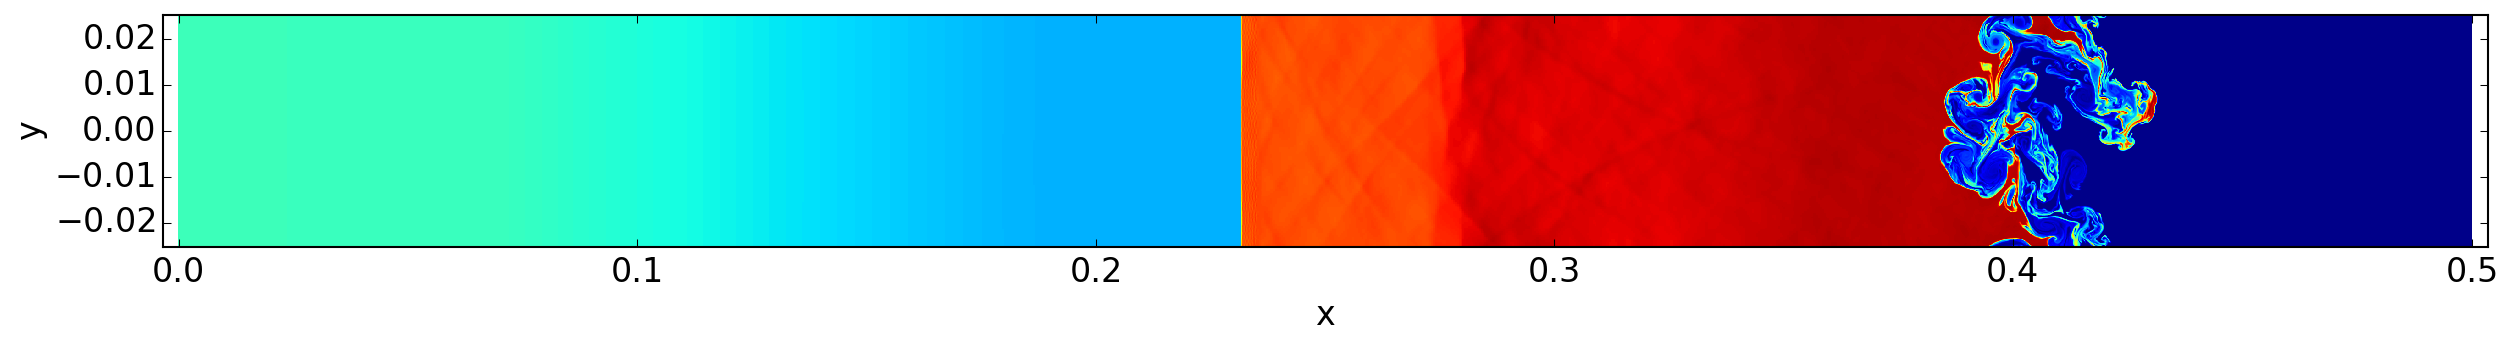

In [6]:
"""
Plot the level of data. (NAN for non-existing data)
"""

data_masked = numpy.ma.masked_where(numpy.isnan(data_rho), data_rho)
X, Y = numpy.meshgrid(x_coords, y_coords)

fig=plt.figure(figsize=(20, 2), dpi= 150)

if numpy.isfortran(data_masked):
    plt.pcolormesh(X, Y, data_masked[:, :, 0].T)
else:
    plt.pcolormesh(X, Y, data_masked[0, :, :].T)

plt.axes().set_aspect('equal', 'datalim')
plt.xlim([x_coords[0], x_coords[-1]])
plt.ylim([y_coords[0], y_coords[-1]])
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
